In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64")

In [5]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [6]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()



In [7]:
monthly_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35
2016-06-30,588701.29,151214.74
2016-07-31,749828.61,210745.90
2016-08-31,842445.29,238536.04
2016-09-30,774270.05,181678.34


Text(0.5, 1.0, 'Monthly Hotel Revenue')

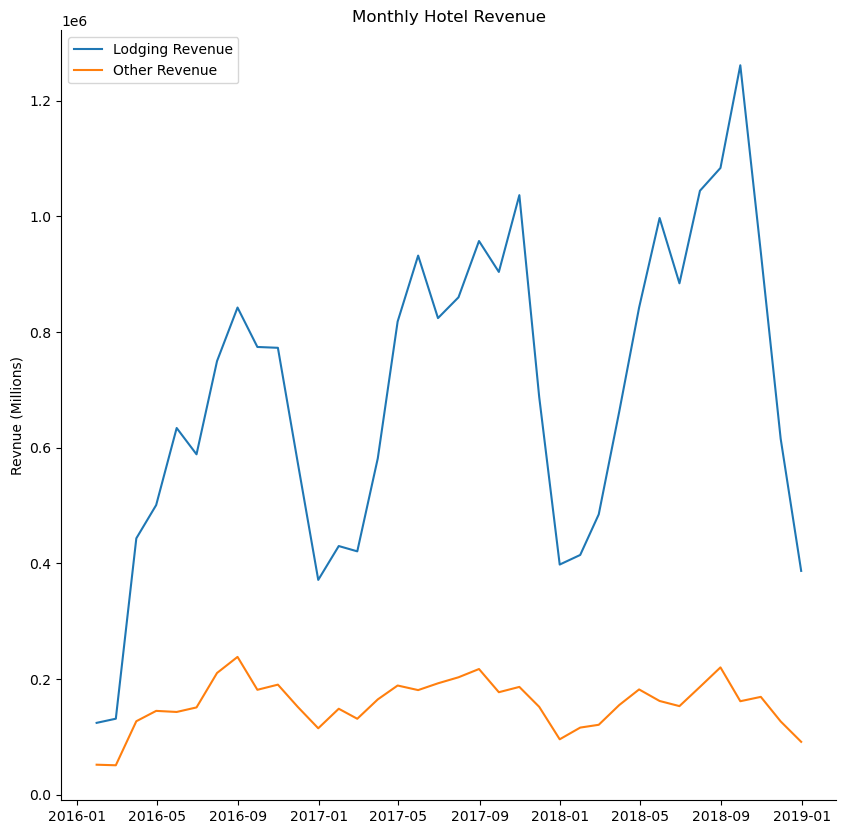

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"], label="Lodging Revenue")
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], label="Other Revenue")
##ax.axvline(1834, c="black")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
ax.set_ylabel("Revnue (Millions)")
ax.set_title("Monthly Hotel Revenue")


# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [9]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()


In [10]:
daily_revenue

,LodgingRevenue,OtherRevenue
date,,
2016-01-01,10591.35,2472.96
2016-01-02,16600.46,11398.50
2016-01-03,13701.23,7978.80
2016-01-04,2896.70,750.98
2016-01-05,13940.15,6580.39
...,...,...
2018-12-27,12226.74,3683.15
2018-12-28,13728.79,3512.40
2018-12-29,25279.16,7768.88


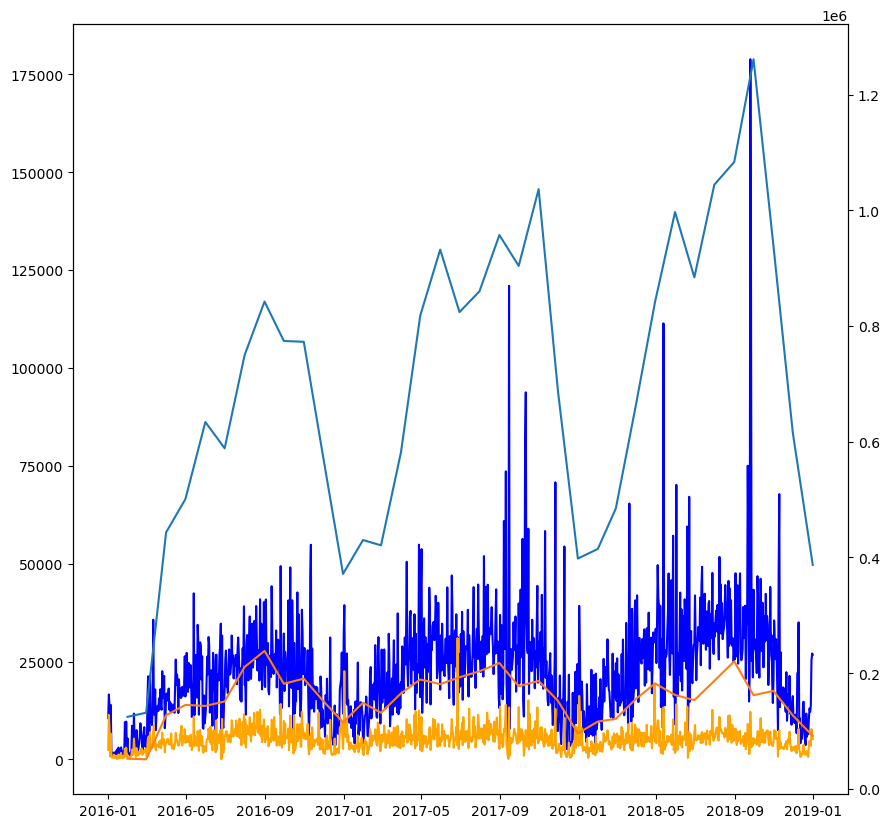

In [11]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot()
ax1.plot(daily_revenue.index, daily_revenue["LodgingRevenue"], label="Room Nights", color="blue")

ax1.plot(daily_revenue.index, daily_revenue["OtherRevenue"], label="Bookings Canceled", color="orange")
ax2 = ax1.twinx()
ax2.plot(monthly_revenue)

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [12]:
quarterly_bookings.head()

NameError: name 'quarterly_bookings' is not defined

# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [13]:

pd.set_option('display.max_columns', None)
hotels.head()



,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01


In [ ]:

top_hotels = hotels.groupby("Nationality").agg({"RoomNights": "sum"}).sort_values("RoomNights", ascending=False).head(10)
top_hotels

,RoomNights
Nationality,
FRA,31018
DEU,26334
PRT,24334
GBR,20822
ESP,10877
ITA,8046
BEL,7758
NLD,6619
BRA,6535


Text(0, 0.5, 'Room Nights')

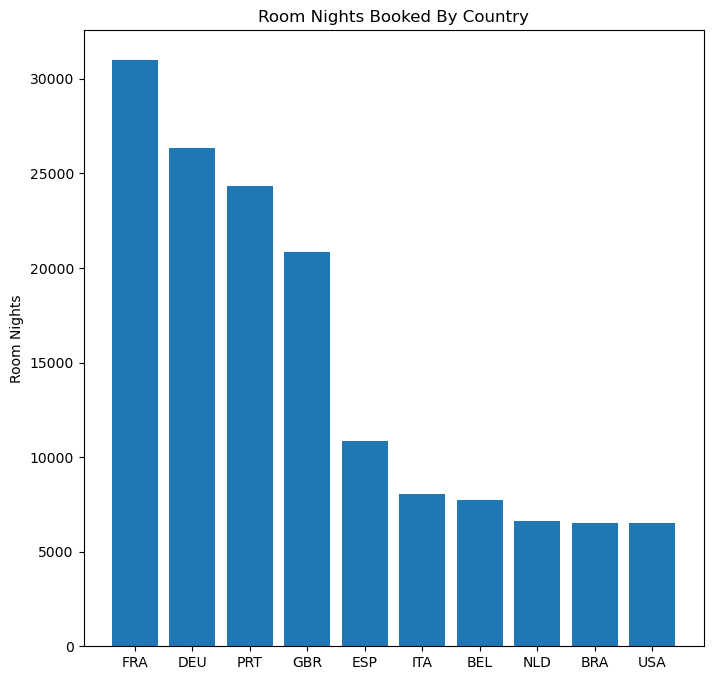

In [ ]:
fig2 = plt.figure(figsize=(8,8))
ax3 = fig2.add_subplot()
ax3.bar(top_hotels.index, top_hotels["RoomNights"])
ax3.set_title("Room Nights Booked By Country")
ax3.set_ylabel("Room Nights")

In [ ]:
nationality = ["FRA", "DEU", "PRT", "GBR", "ESP", "ITA", "BEL", "NLD", "BRA", "USA"]


hotels["Nationality"].isin(nationality)




0         True
1         True
2         True
3         True
4         True
         ...  
83585     True
83586    False
83587    False
83588    False
83589    False
Name: Nationality, Length: 83590, dtype: bool

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

ValueError: shape mismatch: objects cannot be broadcast to a single shape

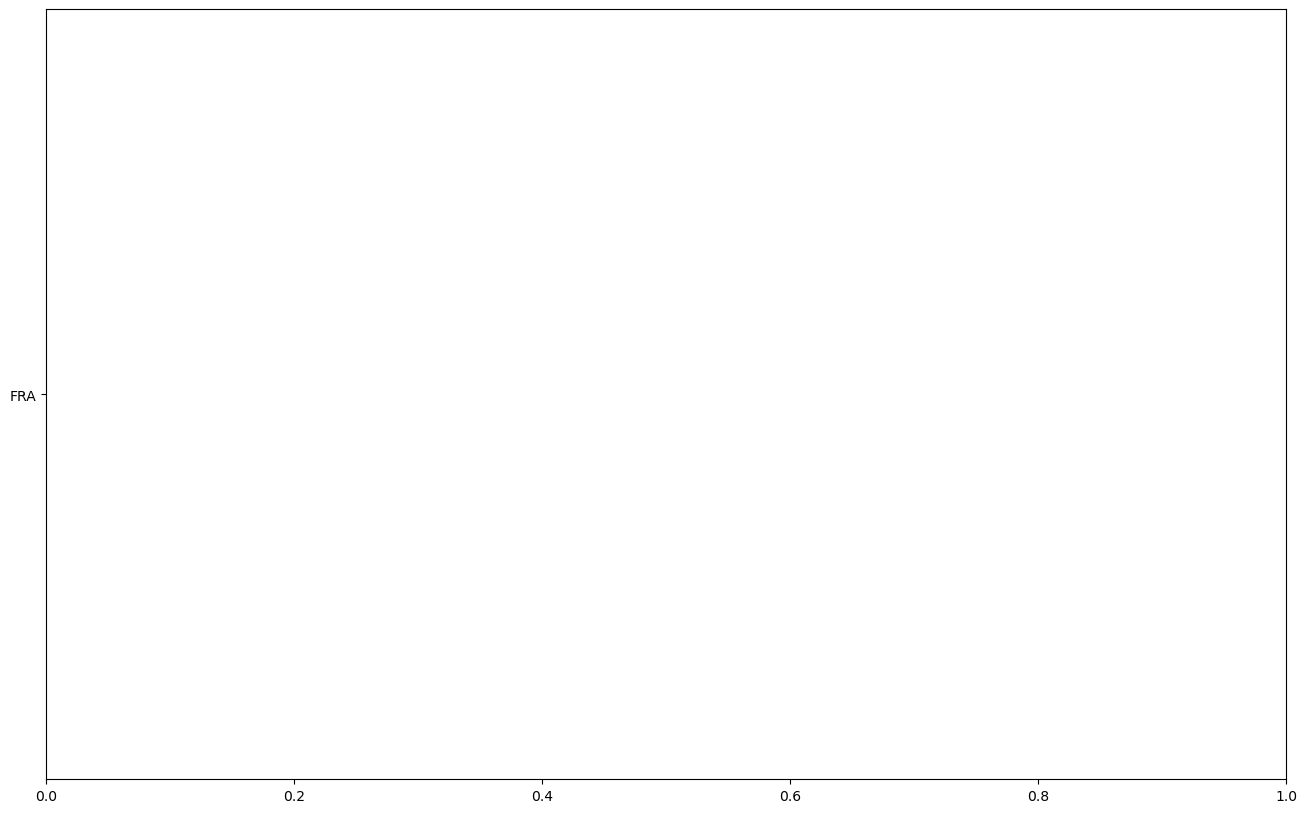

In [30]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

all_countries = hotels[hotels["Nationality"].isin(countries)]
new_country = all_countries.groupby("Nationality").agg({"LodgingRevenue": "sum", "OtherRevenue": "sum"}).sort_values("LodgingRevenue", ascending=False)
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot()
width = .35
X = np.arange(3)
ax.bar(X-width/2,new_country.index, new_country["LodgingRevenue"], width)
ax.bar(X-width/2, new_country.index, new_country["OtherRevenue"], width)

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [ ]:
country_rev = 

country_rev

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!